# Concentrator PV Solar Cell behaviour

CPV solar cells operate under much higher solar illumination levels than conventional PV devices.  Both the current and voltages for a CPV cell rise with increasing solar concentration.

The code below calculates the PV parameters, Isc, Voc, FF and Efficiency for a CPV solar cell over solar concentrations ranging from 1-1500 suns and plots the resulting Jsc, Voc, FF and Efficiency on both linear and log-x scales.

In [49]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from solcore.solar_cell import SolarCell
from solcore.light_source import LightSource
from solcore.solar_cell_solver import solar_cell_solver
from solcore.structure import Junction

T = 298
area=1
concentrations = np.linspace(1,1500,200)

results=[]
for concx in concentrations:
    # Define a UMM cell, InGaP and InGaAs Jsc are in units of A.m-2 and presently set to arbitary values.
    ingap_junction = Junction(kind='2D', T=T, n1=1,n2=2, jref=300,Eg=1.81, j01=5e-27*1E4, j02=4E-14*1E4,  R_series=1E-6,R_shunt=3000000.0, jsc=150*concx)
    ingaas_junction = Junction(kind='2D', T=T, n1=1,n2=2, jref=300, Eg=1.32, j01=6e-19*1E4,j02=3E-12*1E4, R_series=0, R_shunt=1500000.0,jsc=150*concx)
    ge_junction = Junction(kind='2D', T=T, n1=1,n2=2, jref=300, Eg=0.66, j01=4.93e-6*1E4,j02=1.05e-5*1E4, R_series=0, R_shunt=115.0,jsc=189.6*concx)

    #Assemble a solar cell from these juctions
    my_solar_cell = SolarCell([ingap_junction, ingaas_junction, ge_junction], T=T, R_series=0.0, area=area)
    wl = np.linspace(350, 2000, 301) * 1e-9
    light_source = LightSource(source_type='standard', version='AM1.5g', x=wl, output_units='photon_flux_per_m',concentration=concx)

    V = np.linspace(0, 4, 300)
    solar_cell_solver(my_solar_cell, 'iv',
           user_options={'T_ambient': T, 'db_mode': 'top_hat', 'voltages': V, 'light_iv': True,
                                        'internal_voltages': np.linspace(-6, 5, 1100), 'wavelength': wl,
                                        'mpp': True, 'light_source': light_source})

    results.append([concx,my_solar_cell.iv["Isc"],my_solar_cell.iv["Voc"],my_solar_cell.iv["FF"],my_solar_cell.iv["Eta"]])


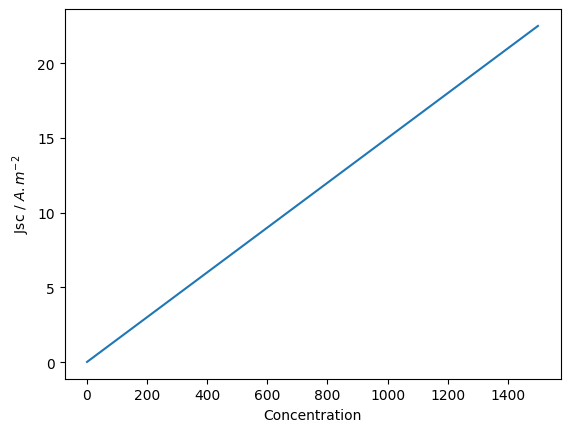

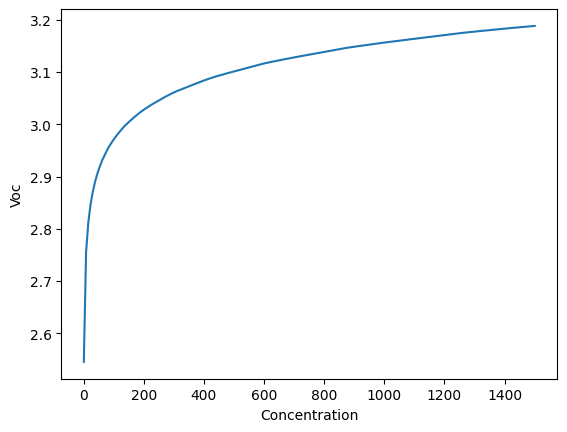

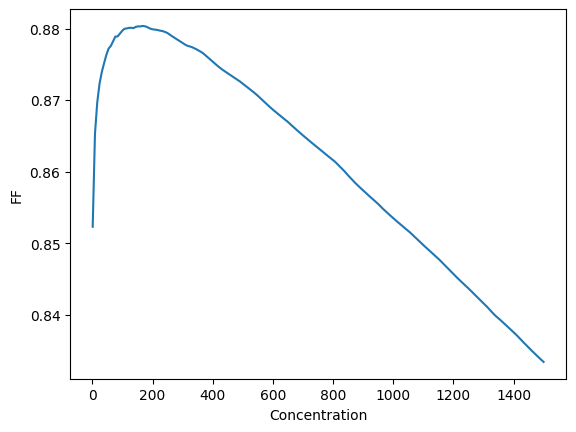

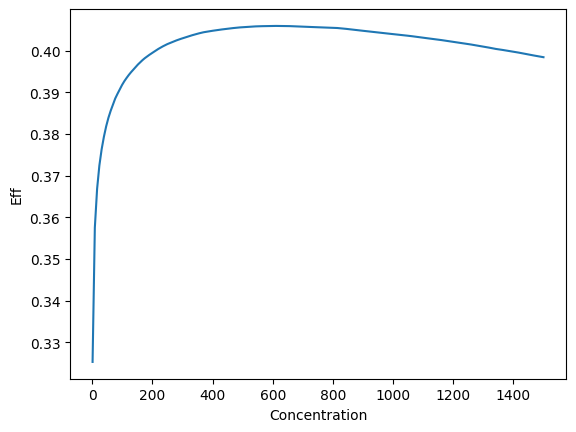

Text(0.5, 0, 'Concentration')

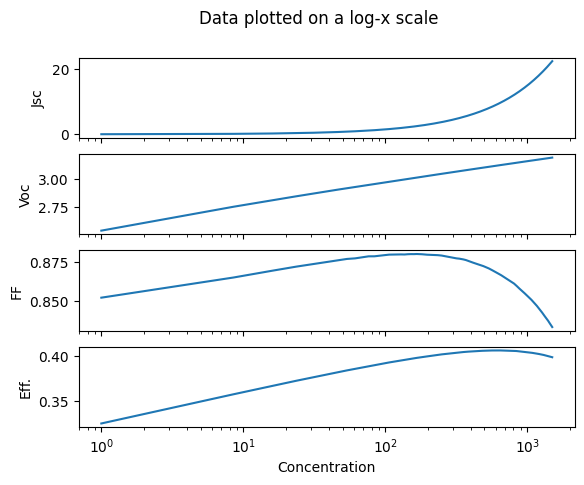

In [50]:
# Plot the graphs
data=np.array(results) # Convert the calculated data into a numpy array

plt.figure(1)
plt.plot (data[:,0], data[:,1]/1E4) # Plot the Isc line on a linear x axis
plt.ylabel('Jsc / $A.m^{-2}$')
plt.xlabel('Concentration')
plt.show()


plt.figure(2)
plt.plot (data[:,0], data[:,2]) # Plot the Voc line on a linear x axis
plt.ylabel('Voc')
plt.xlabel('Concentration')
plt.show()

plt.figure(3)
plt.plot (data[:,0], data[:,3]) # Plot the FF line on a linear x axis
plt.ylabel('FF')
plt.xlabel('Concentration')
plt.show()

plt.figure(4)
plt.plot (data[:,0], data[:,4]) # Plot the Efficiency line on a linear x axis
plt.ylabel('Eff')
plt.xlabel('Concentration')
plt.show()

fig, axs = plt.subplots(4,sharex=True)
fig.suptitle('Data plotted on a log-x scale')
axs[0].semilogx(data[:,0], data[:,1]/1E4) # Plot the Isc line
axs[0].set_ylabel('Jsc')
axs[1].semilogx(data[:,0], data[:,2]) # Plot the Voc line
axs[1].set_ylabel('Voc')
axs[2].semilogx(data[:,0], data[:,3]) # Plot the FF line
axs[2].set_ylabel('FF')
axs[3].semilogx(data[:,0], data[:,4]) # Plot the Eff line
axs[3].set_ylabel('Eff.')
plt.xlabel('Concentration')